# Compare Month Averages from Reshapr and ncra

Visually verify that month-averaged fields calculated by `reshapr extract` and those calculated by `ncra`
differ only at the noise level.

Use `notebooks/dask-expts/environment.yaml` conda environment.

In [1]:
from pathlib import Path

import arrow
import cmocean
import matplotlib.pyplot as plt
import numpy
import xarray

In [2]:
green = xarray.open_dataset("/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_200704_200704_ptrc_T.nc")
green

<xarray.Dataset>
Dimensions:                       (y: 898, x: 398, nvertex: 4, deptht: 40,
                                   axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat                       (y, x) float32 ...
    nav_lon                       (y, x) float32 ...
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] ...
  * time_counter                  (time_counter) datetime64[ns] 2007-04-16
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/17)
    bounds_lon                    (y, x, nvertex) float32 ...
    bounds_lat                    (y, x, nvertex) float32 ...
    area                          (y, x) float32 ...
    deptht_bounds                 (deptht, axis_nbounds) float32 ...
    nitrate                       (time_counter, deptht, y, x) float32 ...
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] ...
    ...                            ...
    ciliates                      (time_counter, deptht, y, x) float32 ...
    microzooplankton              (time_counter, deptht, y, x) float32 ...
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 ...
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 ...
    biogenic_silicon              (time_counter, deptht, y, x) float32 ...
    mesozooplankton               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:                      SalishSea_1d_20070401_20070405
    description:               biogeochemical variables
    title:                     biogeochemical variables
    Conventions:               CF-1.6
    timeStamp:                 2022-Apr-22 20:32:11 GMT
    uuid:                      ae7a2bd7-bc42-4dbf-87c1-2c70666894e3
    history:                   Fri Apr 22 19:57:52 2022: ncra 01apr07/SalishS...
    nco_openmp_thread_number:  1

In [4]:
reshapr = xarray.open_dataset("/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_20070401_20070430.nc")
reshapr

<xarray.Dataset>
Dimensions:                       (time: 1, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * time                          (time) datetime64[ns] 2007-04-15
  * depth                         (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                         (gridY) int64 0 1 2 3 4 ... 894 895 896 897
  * gridX                         (gridX) int64 0 1 2 3 4 ... 394 395 396 397
Data variables:
    nitrate                       (time, depth, gridY, gridX) float32 ...
    ammonium                      (time, depth, gridY, gridX) float32 ...
    silicon                       (time, depth, gridY, gridX) float32 ...
    diatoms                       (time, depth, gridY, gridX) float32 ...
    flagellates                   (time, depth, gridY, gridX) float32 ...
    ciliates                      (time, depth, gridY, gridX) float32 ...
    microzooplankton              (time, depth, gridY, gridX) float32 ...
    dissolved_organic_nitrogen    (time, depth, gridY, gridX) float32 ...
    particulate_organic_nitrogen  (time, depth, gridY, gridX) float32 ...
    biogenic_silicon              (time, depth, gridY, gridX) float32 ...
    mesozooplankton               (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_1m_ptrc_T_20070401_20070430
    description:  Month-averaged biology variables extracted from SalishSeaCa...
    history:      2022-06-17 10:05: Generated by `reshapr extract /results2/S...
    Conventions:  CF-1.6

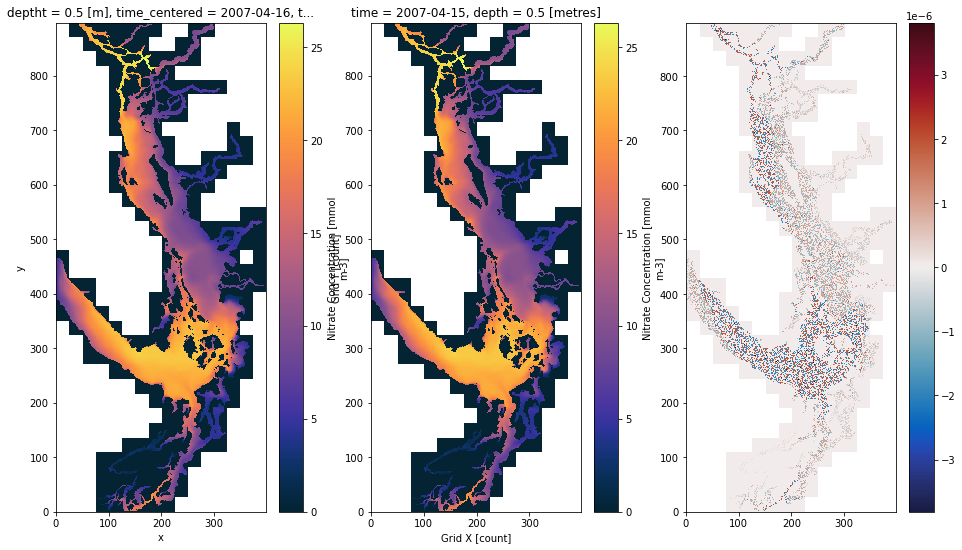

In [5]:
fig, (ax_green, ax_reshapr, ax_diff) = plt.subplots(1, 3, figsize=(16, 9))
green_nitrate = green.nitrate.isel(time_counter=0, deptht=0)
green_nitrate.plot(ax=ax_green, cmap=cmocean.cm.thermal)
reshapr_nitrate = reshapr.nitrate.isel(time=0, depth=0)
reshapr_nitrate.plot(ax=ax_reshapr, cmap=cmocean.cm.thermal)
diff = green_nitrate.to_numpy() - reshapr_nitrate.to_numpy()
c = plt.pcolormesh(diff, cmap=cmocean.cm.balance)
fig.colorbar(c, ax=ax_diff)

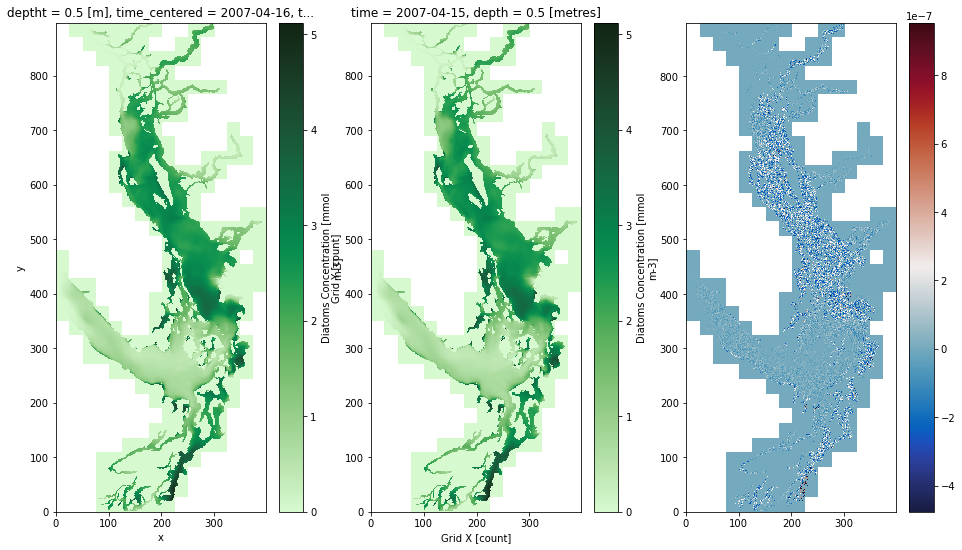

In [6]:
fig, (ax_green, ax_reshapr, ax_diff) = plt.subplots(1, 3, figsize=(16, 9))
green_diatoms = green.diatoms.isel(time_counter=0, deptht=0)
green_diatoms.plot(ax=ax_green, cmap=cmocean.cm.algae)
reshapr_diatoms = reshapr.diatoms.isel(time=0, depth=0)
reshapr_diatoms.plot(ax=ax_reshapr, cmap=cmocean.cm.algae)
diff = green_diatoms.to_numpy() - reshapr_diatoms.to_numpy()
c = plt.pcolormesh(diff, cmap=cmocean.cm.balance)
fig.colorbar(c, ax=ax_diff)

In [7]:
green.close()
reshapr.close()
